In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("/kaggle/input/edge-iiotset-1/ML-EdgeIIoT-dataset.csv")
print(data.shape)

/tmp/ipykernel_30/2129744183.py:4: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/edge-iiotset-1/ML-EdgeIIoT-dataset.csv")


(157800, 63)


In [2]:
# features
print(data.keys())

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [3]:
print(data['Attack_type'].value_counts())

Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: count, dtype: int64


In [4]:
delete = []

for i in data.index:

    if data['Attack_type'][i] != 'Normal' and data['Attack_type'][i] != 'MITM':
        delete.append(i)

data = data.drop(delete)

print(data['Attack_type'].value_counts())

Attack_type
Normal    24301
MITM       1214
Name: count, dtype: int64


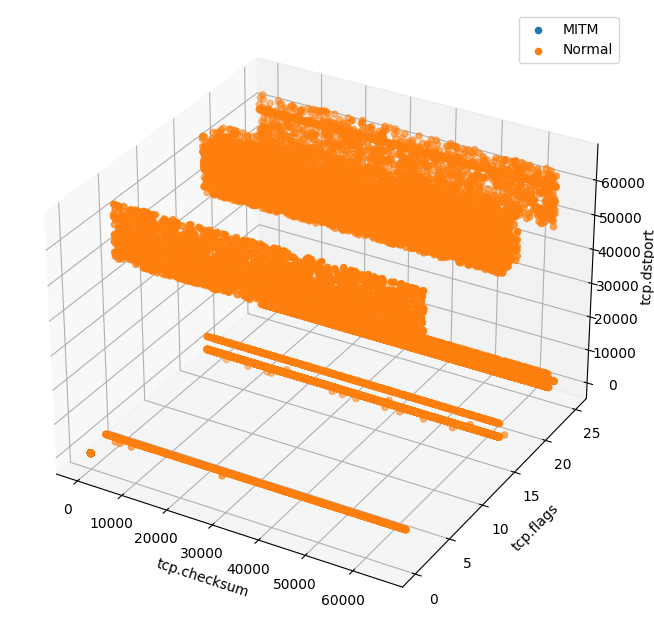

In [5]:
# Variaveis importantes de acordo com RFE Random Forest

# tcp.checksum -- tcp.flags -- tcp.dstport -- tcp.ack -- tcp.seq -- tcp.flags.ack -- tcp.len -- tcp.connection.rst -- udp.time_delta


import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



for i in data['Attack_type'].unique():
    classes = data[data['Attack_type'] == i]
    ax.scatter(classes['tcp.checksum'], classes['tcp.flags'], classes['tcp.dstport'], label=i)


ax.set_xlabel('tcp.checksum')
ax.set_ylabel('tcp.flags')
ax.set_zlabel('tcp.dstport')
plt.title('')
plt.legend()
plt.show()

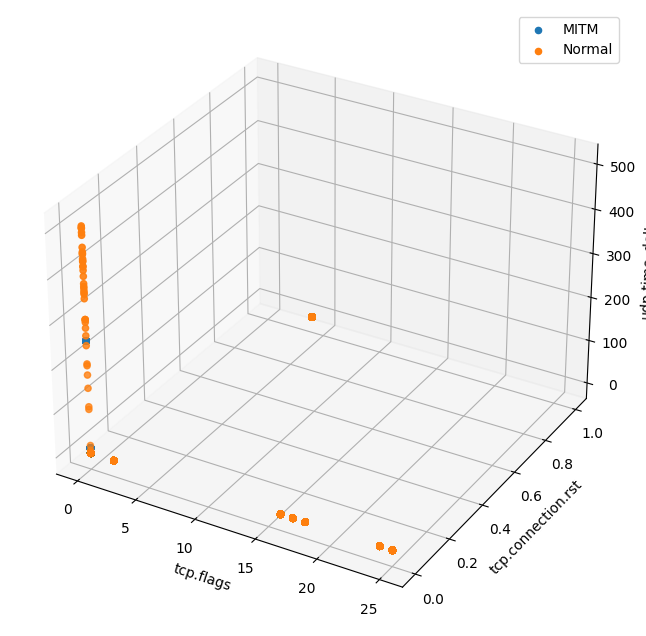

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



for i in data['Attack_type'].unique():
    classes = data[data['Attack_type'] == i]
    ax.scatter(classes['tcp.flags'], classes['tcp.connection.rst'], classes['udp.time_delta'], label=i)


ax.set_xlabel('tcp.flags')
ax.set_ylabel('tcp.connection.rst')
ax.set_zlabel('udp.time_delta')
plt.title('')
plt.legend()
plt.show()

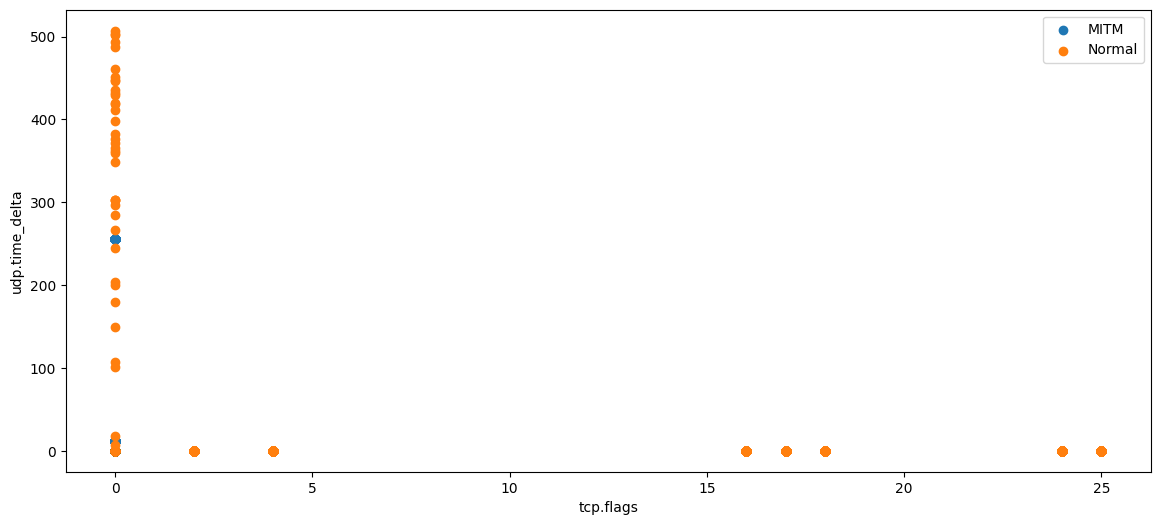

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in data['Attack_type'].unique():
    dataclass = data[data['Attack_type'] == i]
    plt.scatter(dataclass['tcp.flags'], dataclass['udp.time_delta'], label=i)
plt.xlabel('tcp.flags')
plt.ylabel('udp.time_delta')
plt.legend()
plt.title('')
plt.show()

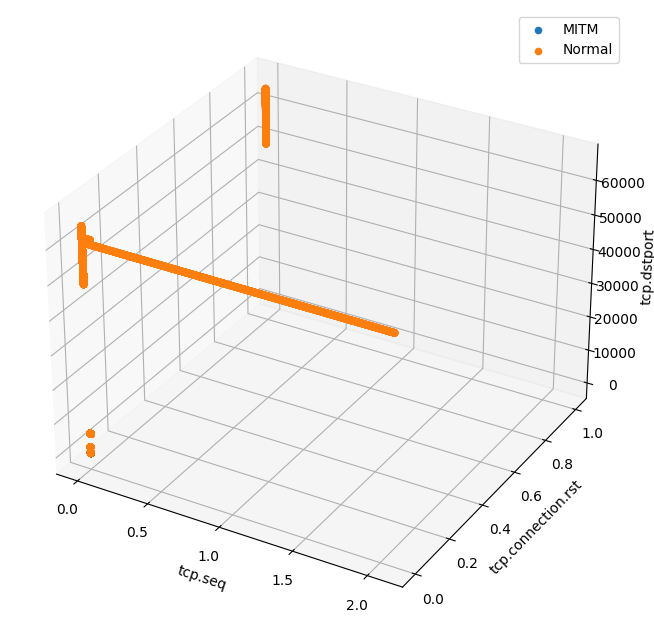

In [8]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



for i in data['Attack_type'].unique():
    classes = data[data['Attack_type'] == i]
    ax.scatter(classes['tcp.seq'], classes['tcp.connection.rst'], classes['tcp.dstport'], label=i)


ax.set_xlabel('tcp.seq')
ax.set_ylabel('tcp.connection.rst')
ax.set_zlabel('tcp.dstport')
plt.title('')
plt.legend()
plt.show()

In [9]:
# sem o trafego normal

x = []

for i in data.index:
    if data['Attack_type'][i] == 'Normal':
        x.append(i)

data = data.drop(x)

print(data['Attack_type'].value_counts())

Attack_type
MITM    1214
Name: count, dtype: int64


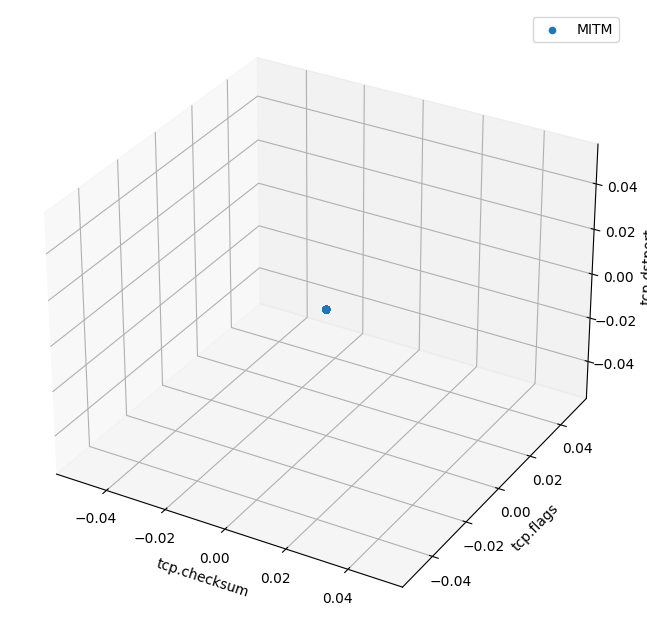

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



for i in data['Attack_type'].unique():
    classes = data[data['Attack_type'] == i]
    ax.scatter(classes['tcp.checksum'], classes['tcp.flags'], classes['tcp.dstport'], label=i)


ax.set_xlabel('tcp.checksum')
ax.set_ylabel('tcp.flags')
ax.set_zlabel('tcp.dstport')
plt.title('')
plt.legend()
plt.show()

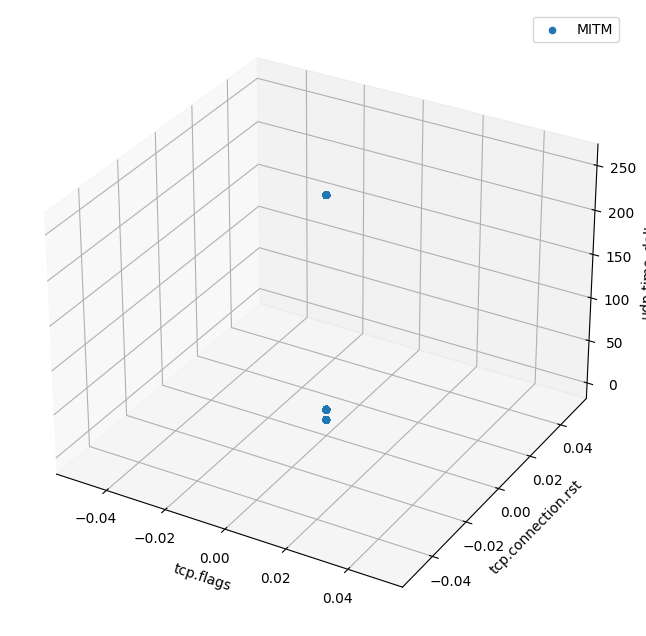

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i in data['Attack_type'].unique():
    classes = data[data['Attack_type'] == i]
    ax.scatter(classes['tcp.flags'], classes['tcp.connection.rst'], classes['udp.time_delta'], label=i)


ax.set_xlabel('tcp.flags')
ax.set_ylabel('tcp.connection.rst')
ax.set_zlabel('udp.time_delta')
plt.title('')
plt.legend()
plt.show()

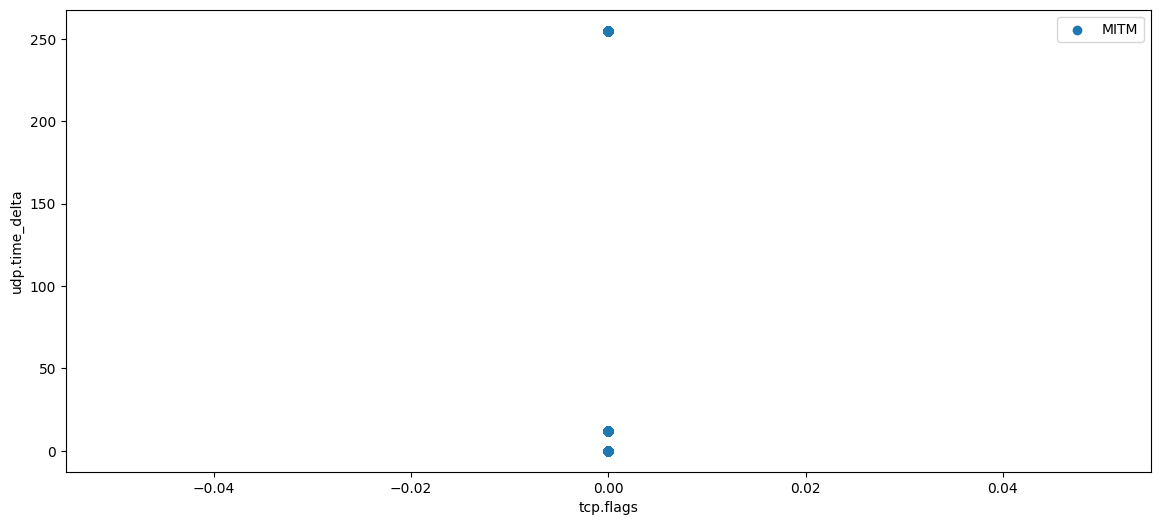

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in data['Attack_type'].unique():
    dataclass = data[data['Attack_type'] == i]
    plt.scatter(dataclass['tcp.flags'], dataclass['udp.time_delta'], label=i)
plt.xlabel('tcp.flags')
plt.ylabel('udp.time_delta')
plt.legend()
plt.title('')
plt.show()

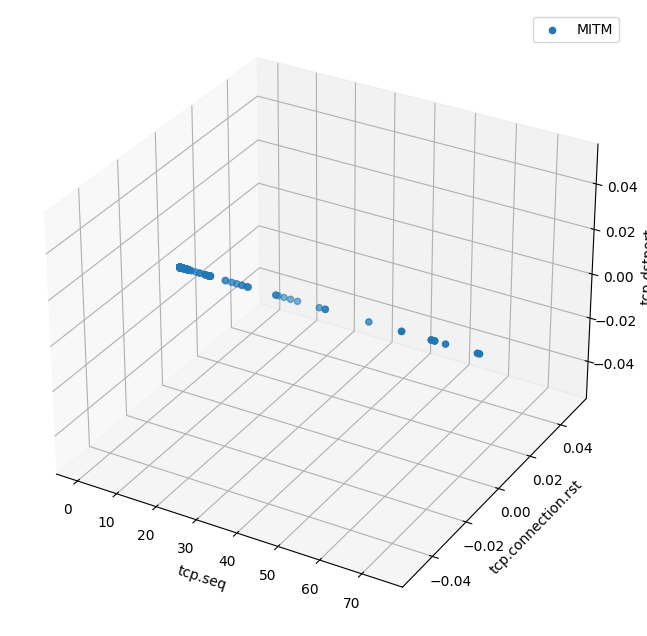

In [13]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



for i in data['Attack_type'].unique():
    classes = data[data['Attack_type'] == i]
    ax.scatter(classes['tcp.seq'], classes['tcp.connection.rst'], classes['tcp.dstport'], label=i)


ax.set_xlabel('tcp.seq')
ax.set_ylabel('tcp.connection.rst')
ax.set_zlabel('tcp.dstport')
plt.title('')
plt.legend()
plt.show()

**TREINAMENTO DOS MODELOS COM POUCOS DADOS**

In [14]:
data_train = pd.read_csv("/kaggle/input/edge-iiotset-1/ML-EdgeIIoT-dataset.csv")

# balanceamento 

delete = []

for i in data_train.index:
    if data_train['Attack_type'][i] != 'Normal' and data_train['Attack_type'][i] != 'MITM':
        delete.append(i)

data_train = data_train.drop(delete)

normal = []

for i in data_train.index:
    if data_train['Attack_type'][i] == 'Normal':
        normal.append(i)

normal = normal[:23087]
data_train = data_train.drop(normal)


print(data_train['Attack_type'].value_counts())

/tmp/ipykernel_30/3266650216.py:1: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("/kaggle/input/edge-iiotset-1/ML-EdgeIIoT-dataset.csv")


Attack_type
MITM      1214
Normal    1214
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()


categorical_columns = [col for col in data_train.columns if data_train[col].dtype == 'object']


for col in categorical_columns:
    data_train[col] = label.fit_transform(data_train[col].astype(str))

print(data.head())

  frame.time    ip.src_host ip.dst_host arp.dst.proto_ipv4  arp.opcode  \
0        6.0  192.168.0.152         0.0                0.0         0.0   
1        6.0  192.168.0.101         0.0                0.0         0.0   
2        6.0  192.168.0.152         0.0                0.0         0.0   
3        6.0  192.168.0.101         0.0                0.0         0.0   
4        6.0  192.168.0.152         0.0                0.0         0.0   

   arp.hw.size arp.src.proto_ipv4  icmp.checksum  icmp.seq_le  \
0          0.0                0.0            0.0          0.0   
1          0.0                0.0            0.0          0.0   
2          0.0                0.0            0.0          0.0   
3          0.0                0.0            0.0          0.0   
4          0.0                0.0            0.0          0.0   

   icmp.transmit_timestamp  ...  mqtt.proto_len mqtt.protoname  mqtt.topic  \
0                      0.0  ...             0.0            0.0         0.0   
1       

In [16]:
print(data_train['Attack_label'].unique())

[1 0]


In [17]:
X = data_train.drop(['Attack_label', 'Attack_type'], axis=1)
y = data_train['Attack_label']

print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [18]:
X = X.values
y = y.values

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

print("executado")

executado


In [20]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Accuracy train: ", rf_model.score(X_train, y_train))

# cross validation
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()),"\n")
print("Accuracy test: ", rf_model.score(X_test, y_test), "\n")

# 7. Avaliar o modelo
y_pred = rf_model.predict(X_test)

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\n")

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Accuracy train:  1.0
Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.00 

Accuracy test:  1.0 


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00       413

    accuracy                           1.00       802
   macro avg       1.00      1.00      1.00       802
weighted avg       1.00      1.00      1.00       802



Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


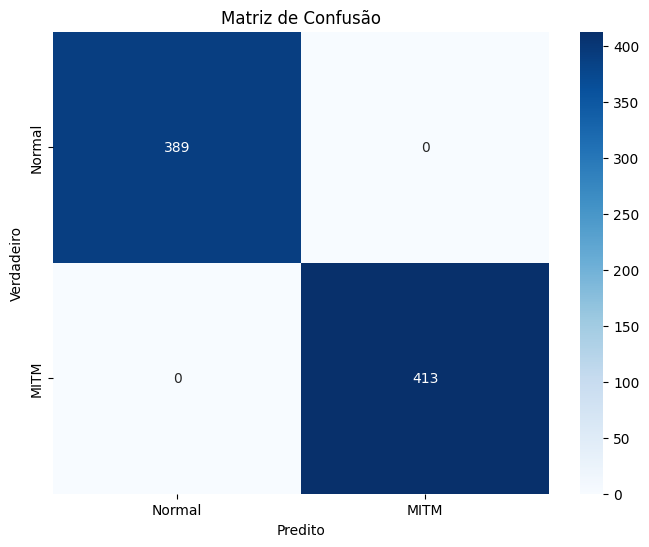

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [21]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'MITM'], yticklabels=['Normal', 'MITM'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# Visualizar a importância das features
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Features Mais Importantes')
plt.show()

Accuracy train:  0.8751537515375154
Cross-validation scores: [0.88650307 0.87076923 0.88923077 0.85846154 0.86153846]
Average cross-validation score: 0.87 

Accuracy test:  0.885286783042394 


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.87       389
           1       0.82      1.00      0.90       413

    accuracy                           0.89       802
   macro avg       0.91      0.88      0.88       802
weighted avg       0.91      0.89      0.88       802





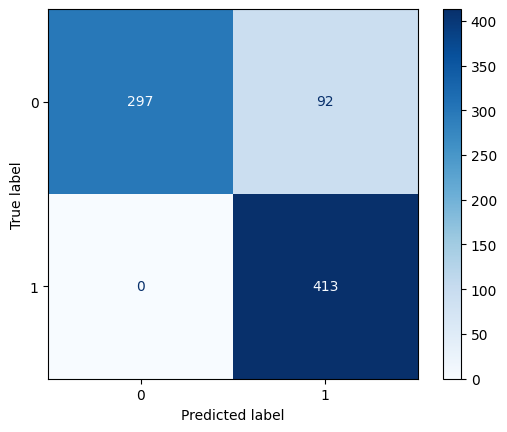



Cross-validation accuracy scores: [0.88650307 0.87076923 0.88923077 0.85846154 0.86153846]
Mean accuracy: 0.8733006134969326


In [22]:
# SVM


from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

print("Accuracy train: ", svm_model.score(X_train, y_train))

# cross validation
scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()),"\n")
print("Accuracy test: ", svm_model.score(X_test, y_test), "\n")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\n")

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap="Blues")
plt.show()

print("\n")

scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())